In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
oly_stocks = pd.read_csv('./cleaned-datasets/olympic_year_stock_price.csv')
nonoly_stocks = pd.read_csv('./cleaned-datasets/nonolympic_year_stock_price.csv')
oly_demand = pd.read_csv('./cleaned-datasets/olympic_uk_energy_demand.csv')
nonoly_demand = pd.read_csv('./cleaned-datasets/nonolympic_uk_energy_demand.csv')

In [263]:
oly_demand

,Unnamed: 0,date_time,total_demand,combined_cycle_gas_turbine_generation,oil_generation,coal_generation,nuclear_generation,wind_generation,pumped_storage_generation,nonpumped_storage_hydro_generation,open_cycle_gas_turbine_generation,other_generation,biomass_generation,embedded_solar_generation,embedded_wind_generation,BritNet_flow,total_ma7,detrended_total_ma7
0,1152,2012-01-01,1581286,471776,0,407517,338227,126654,18868,37757,0,0,0,414.0,49356.0,47638.0,1.691654e+06,-192650.959530
1,1153,2012-01-02,1721063,538862,0,491569,339700,132693,15650,37364,0,0,0,1203.0,55177.0,25545.0,1.717524e+06,-156271.245244
2,1154,2012-01-03,2001822,585353,0,739060,334309,103629,15706,38607,0,0,0,542.0,69985.0,32000.0,1.769831e+06,-101336.673815
3,1155,2012-01-04,2076632,548164,0,817790,339921,127312,17790,38710,0,0,0,560.0,71724.0,37436.0,1.814232e+06,-89645.245244
4,1156,2012-01-05,2055134,522723,0,794084,362084,126534,18090,39720,360,0,0,898.0,68270.0,39367.0,1.847655e+06,-91276.388101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1513,2012-12-27,1769241,318750,0,775832,402188,101435,13316,30590,0,2111,23028,1440.0,38460.0,35814.0,1.733266e+06,26641.326185
362,1514,2012-12-28,1783971,239511,0,752158,413360,194696,13504,31190,0,346,3610,811.0,65986.0,36738.0,1.707577e+06,20269.326185
363,1515,2012-12-29,1701117,250653,0,609863,416264,196089,15416,33086,0,1578,17253,690.0,66674.0,45368.0,1.695330e+06,17200.183327
364,1516,2012-12-30,1683034,182373,0,626510,423188,213419,12222,32784,0,1986,21618,2121.0,75939.0,43989.0,1.696407e+06,32177.897613


In [264]:
oly_stocks.drop(columns=['Unnamed: 0'], inplace=True)
nonoly_stocks.drop(columns=['Unnamed: 0'], inplace=True)
oly_demand.drop(columns=['Unnamed: 0'], inplace=True)
nonoly_demand.drop(columns=['Unnamed: 0'], inplace=True)

In [265]:
oly_stocks

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol,detrended_edf_close,detrended_tte_close
0,2012-01-03,19.21,-0.051015,1200.00,52.470001,-0.003812,3566.0,-6.64,-1.83
1,2012-01-04,18.23,-0.021393,2440.00,52.270000,-0.020279,3252.5,-7.61,-2.03
2,2012-01-05,17.84,-0.001682,1440.00,51.209999,-0.008983,2800.0,-7.99,-3.09
3,2012-01-06,17.81,-0.002246,885.78,50.750000,0.009852,2166.7,-8.02,-3.54
4,2012-01-09,17.77,0.014069,1240.00,51.250000,0.005073,2471.2,-8.05,-3.04
...,...,...,...,...,...,...,...,...,...
242,2012-12-21,14.01,-0.003569,1870.00,51.599998,0.000581,1713.8,-9.80,-2.10
243,2012-12-24,13.96,0.000000,464.47,51.630001,-0.001743,434.5,-9.84,-2.07
244,2012-12-27,13.96,-0.011461,654.84,52.400002,-0.018511,1697.8,-9.84,-1.29
245,2012-12-28,13.80,0.013043,910.76,51.430000,0.011277,831.2,-9.99,-2.26


In [266]:
oly_stocks.Date = pd.to_datetime(oly_stocks.Date)
oly_stocks['Day_of_year'] = oly_stocks.Date.dt.dayofyear

In [267]:
nonoly_stocks.Date = pd.to_datetime(nonoly_stocks.Date)
nonoly_stocks['Year'] = nonoly_stocks.Date.dt.year
nonoly_stocks['Day_of_year'] = nonoly_stocks.Date.dt.dayofyear


In [268]:
nonoly_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1499 non-null   datetime64[ns]
 1   edf_close            1499 non-null   float64       
 2   edf_pct0             1499 non-null   float64       
 3   edf_vol              1499 non-null   float64       
 4   tte_close            1499 non-null   float64       
 5   tte_pct0             1499 non-null   float64       
 6   tte_vol              1499 non-null   float64       
 7   detrended_edf_close  1499 non-null   float64       
 8   detrended_tte_close  1499 non-null   float64       
 9   Year                 1499 non-null   int32         
 10  Day_of_year          1499 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(2)
memory usage: 117.2 KB


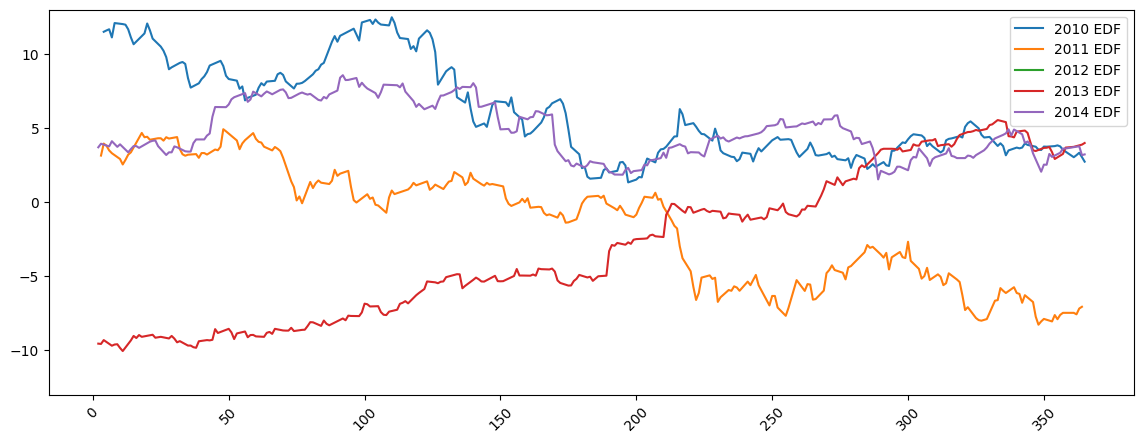

In [277]:
plt.figure(figsize=(14, 5))


for year in range(2010, 2015):
    year_data = nonoly_stocks[nonoly_stocks.Year == year]
    plt.plot(year_data.Day_of_year, year_data.detrended_edf_close, label=f'{year} EDF')

plt.xticks(rotation=45)
plt.ylim(-13, 13)
plt.legend()
plt.show()

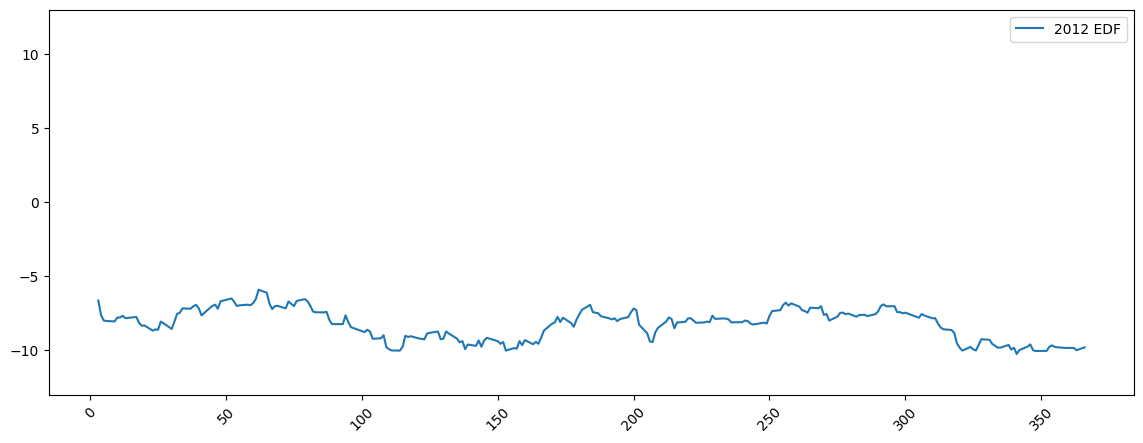

In [278]:
plt.figure(figsize=(14, 5))

# plt.plot(oly_stocks.Day_of_year, oly_stocks.edf_close, label='2012 EDF')
plt.plot(oly_stocks.Day_of_year, oly_stocks.detrended_edf_close, label='2012 EDF')

plt.xticks(rotation=45)
plt.ylim(-13, 13)
plt.legend()
plt.show()

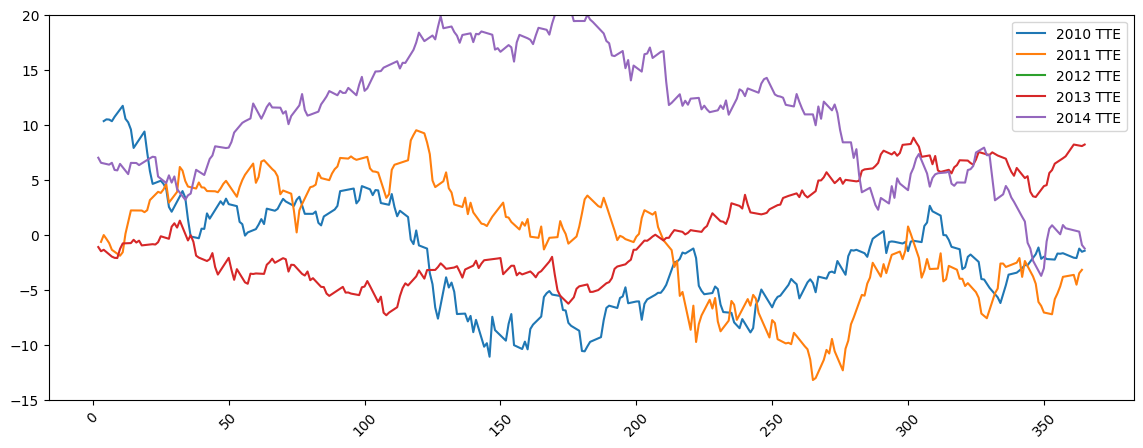

In [283]:
plt.figure(figsize=(14, 5))


for year in range(2010, 2015):
    year_data = nonoly_stocks[nonoly_stocks.Year == year]
    plt.plot(year_data.Day_of_year, year_data.detrended_tte_close, label=f'{year} TTE')

plt.xticks(rotation=45)
plt.ylim(-15, 20)
plt.legend()
plt.show()

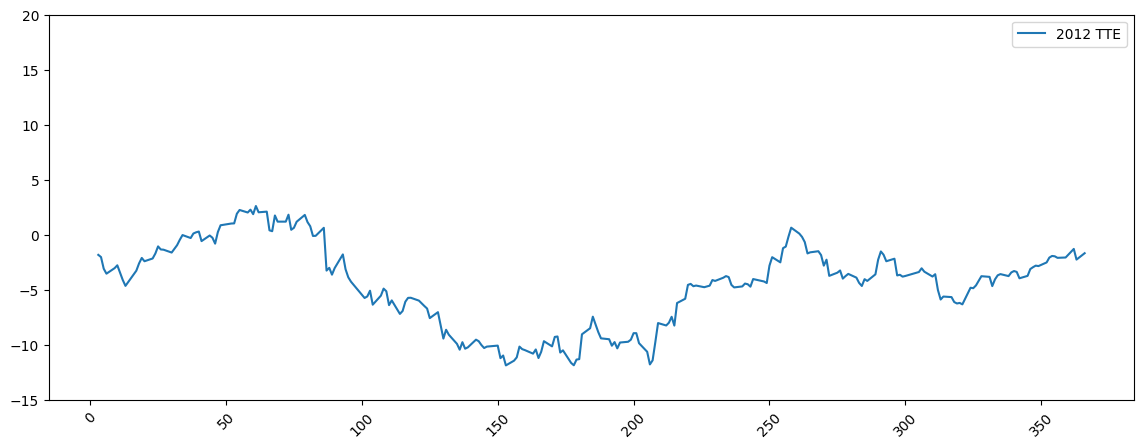

In [284]:
plt.figure(figsize=(14, 5))

plt.plot(oly_stocks.Day_of_year, oly_stocks.detrended_tte_close, label='2012 TTE')

plt.xticks(rotation=45)
plt.ylim(-15, 20)
plt.legend()
plt.show()

In [285]:
oly_demand.date_time = pd.to_datetime(oly_demand.date_time)
nonoly_demand.date_time = pd.to_datetime(nonoly_demand.date_time)

In [286]:
oly_demand['Day_of_year'] = oly_demand.date_time.dt.dayofyear
nonoly_demand['Day_of_year'] = nonoly_demand.date_time.dt.dayofyear
oly_demand['Year'] = oly_demand.date_time.dt.year
nonoly_demand['Year'] = nonoly_demand.date_time.dt.year

In [288]:
oly_demand

,date_time,total_demand,combined_cycle_gas_turbine_generation,oil_generation,coal_generation,nuclear_generation,wind_generation,pumped_storage_generation,nonpumped_storage_hydro_generation,open_cycle_gas_turbine_generation,other_generation,biomass_generation,embedded_solar_generation,embedded_wind_generation,BritNet_flow,total_ma7,detrended_total_ma7,Day_of_year,Year
0,2012-01-01,1581286,471776,0,407517,338227,126654,18868,37757,0,0,0,414.0,49356.0,47638.0,1.691654e+06,-192650.959530,1,2012
1,2012-01-02,1721063,538862,0,491569,339700,132693,15650,37364,0,0,0,1203.0,55177.0,25545.0,1.717524e+06,-156271.245244,2,2012
2,2012-01-03,2001822,585353,0,739060,334309,103629,15706,38607,0,0,0,542.0,69985.0,32000.0,1.769831e+06,-101336.673815,3,2012
3,2012-01-04,2076632,548164,0,817790,339921,127312,17790,38710,0,0,0,560.0,71724.0,37436.0,1.814232e+06,-89645.245244,4,2012
4,2012-01-05,2055134,522723,0,794084,362084,126534,18090,39720,360,0,0,898.0,68270.0,39367.0,1.847655e+06,-91276.388101,5,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,1769241,318750,0,775832,402188,101435,13316,30590,0,2111,23028,1440.0,38460.0,35814.0,1.733266e+06,26641.326185,362,2012
362,2012-12-28,1783971,239511,0,752158,413360,194696,13504,31190,0,346,3610,811.0,65986.0,36738.0,1.707577e+06,20269.326185,363,2012
363,2012-12-29,1701117,250653,0,609863,416264,196089,15416,33086,0,1578,17253,690.0,66674.0,45368.0,1.695330e+06,17200.183327,364,2012
364,2012-12-30,1683034,182373,0,626510,423188,213419,12222,32784,0,1986,21618,2121.0,75939.0,43989.0,1.696407e+06,32177.897613,365,2012


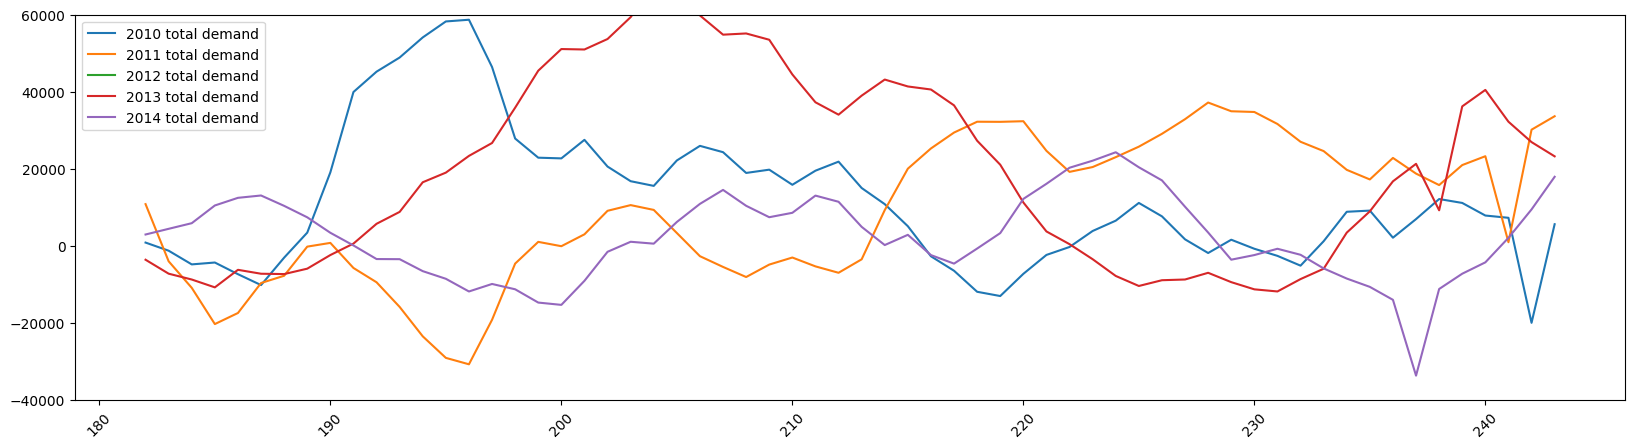

In [293]:
plt.figure(figsize=(20, 5))


for year in range(2010, 2015):
    # year_data = nonoly_demand[nonoly_demand.Year == year]
    mo_data = nonoly_demand[nonoly_demand.date_time.dt.month.isin([7, 8]) & (nonoly_demand.Year == year)]
    plt.plot(mo_data.Day_of_year, mo_data.detrended_total_ma7, label=f'{year} total demand')

plt.xticks(rotation=45)
plt.ylim(-40000, 60000)
plt.legend()
plt.show()

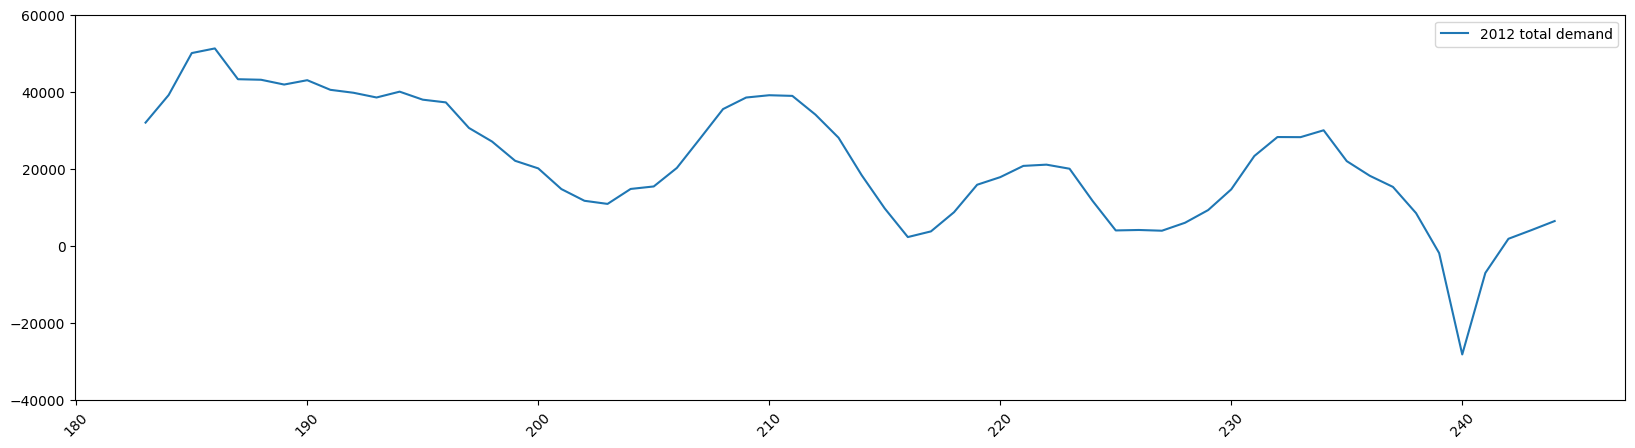

In [295]:
plt.figure(figsize=(20, 5))

mo_data = oly_demand[oly_demand.date_time.dt.month.isin([7, 8])]
plt.plot(mo_data.Day_of_year, mo_data.detrended_total_ma7, label='2012 total demand')

plt.xticks(rotation=45)
plt.ylim(-40000, 60000)
plt.legend()
plt.show()

In [296]:
oly_stocks['Year'] = oly_stocks.Date.dt.year

In [297]:
stock_merged = pd.concat([oly_stocks, nonoly_stocks], ignore_index=True)

In [298]:
stock_merged

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol,detrended_edf_close,detrended_tte_close,Day_of_year,Year
0,2012-01-03,19.21,-0.051015,1200.00,52.470001,-0.003812,3566.0,-6.64,-1.83,3,2012
1,2012-01-04,18.23,-0.021393,2440.00,52.270000,-0.020279,3252.5,-7.61,-2.03,4,2012
2,2012-01-05,17.84,-0.001682,1440.00,51.209999,-0.008983,2800.0,-7.99,-3.09,5,2012
3,2012-01-06,17.81,-0.002246,885.78,50.750000,0.009852,2166.7,-8.02,-3.54,6,2012
4,2012-01-09,17.77,0.014069,1240.00,51.250000,0.005073,2471.2,-8.05,-3.04,9,2012
...,...,...,...,...,...,...,...,...,...,...,...
1741,2015-12-24,12.68,-0.016562,409.60,45.889999,-0.011331,834.6,-4.83,-5.95,358,2015
1742,2015-12-28,12.47,0.001604,1800.00,45.369999,0.010580,1036.2,-5.04,-6.47,362,2015
1743,2015-12-29,12.49,0.000801,1610.00,45.849998,-0.015049,2315.8,-5.01,-5.99,363,2015
1744,2015-12-30,12.50,0.007200,1980.00,45.160000,-0.004650,1141.6,-4.99,-6.67,364,2015


In [299]:
demand_merged = pd.concat([oly_demand, nonoly_demand], ignore_index=True)

In [300]:
demand_merged.rename(columns={'date_time' : 'Date'}, inplace=True)

In [301]:
demand_merged

,Date,total_demand,combined_cycle_gas_turbine_generation,oil_generation,coal_generation,nuclear_generation,wind_generation,pumped_storage_generation,nonpumped_storage_hydro_generation,open_cycle_gas_turbine_generation,other_generation,biomass_generation,embedded_solar_generation,embedded_wind_generation,BritNet_flow,total_ma7,detrended_total_ma7,Day_of_year,Year
0,2012-01-01,1581286,471776,0,407517,338227,126654,18868,37757,0,0,0,414.0,49356.0,47638.0,1.691654e+06,-192650.959530,1,2012
1,2012-01-02,1721063,538862,0,491569,339700,132693,15650,37364,0,0,0,1203.0,55177.0,25545.0,1.717524e+06,-156271.245244,2,2012
2,2012-01-03,2001822,585353,0,739060,334309,103629,15706,38607,0,0,0,542.0,69985.0,32000.0,1.769831e+06,-101336.673815,3,2012
3,2012-01-04,2076632,548164,0,817790,339921,127312,17790,38710,0,0,0,560.0,71724.0,37436.0,1.814232e+06,-89645.245244,4,2012
4,2012-01-05,2055134,522723,0,794084,362084,126534,18090,39720,360,0,0,898.0,68270.0,39367.0,1.847655e+06,-91276.388101,5,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2014-12-27,1666777,318660,0,598327,352408,127496,16572,32099,0,4487,48904,8730.0,45699.0,43111.0,1.679160e+06,-1732.673815,361,2014
1822,2014-12-28,1685793,333105,0,677813,351221,73545,14244,27669,0,4188,45727,18079.0,26234.0,45703.0,1.678851e+06,3837.611899,362,2014
1823,2014-12-29,1837117,482600,0,681304,360120,92860,13430,25510,0,3489,38104,17455.0,29470.0,46950.0,1.681596e+06,11256.754756,363,2014
1824,2014-12-30,1848835,465707,0,623501,373604,129102,15278,23520,0,4548,49661,15315.0,45536.0,48263.0,1.689664e+06,36641.183327,364,2014


In [302]:
df = stock_merged.merge(demand_merged, on='Date', how='inner')

In [303]:
df

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol,detrended_edf_close,detrended_tte_close,Day_of_year_x,...,open_cycle_gas_turbine_generation,other_generation,biomass_generation,embedded_solar_generation,embedded_wind_generation,BritNet_flow,total_ma7,detrended_total_ma7,Day_of_year_y,Year_y
0,2012-01-03,19.21,-0.051015,1200.00,52.470001,-0.003812,3566.0,-6.64,-1.83,3,...,0,0,0,542.0,69985.0,32000.0,1.769831e+06,-101336.673815,3,2012
1,2012-01-04,18.23,-0.021393,2440.00,52.270000,-0.020279,3252.5,-7.61,-2.03,4,...,0,0,0,560.0,71724.0,37436.0,1.814232e+06,-89645.245244,4,2012
2,2012-01-05,17.84,-0.001682,1440.00,51.209999,-0.008983,2800.0,-7.99,-3.09,5,...,360,0,0,898.0,68270.0,39367.0,1.847655e+06,-91276.388101,5,2012
3,2012-01-06,17.81,-0.002246,885.78,50.750000,0.009852,2166.7,-8.02,-3.54,6,...,309,0,0,1048.0,39074.0,40652.0,1.876405e+06,-100153.673815,6,2012
4,2012-01-09,17.77,0.014069,1240.00,51.250000,0.005073,2471.2,-8.05,-3.04,9,...,647,0,0,859.0,33753.0,21617.0,1.957660e+06,-116190.245244,9,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2014-12-23,23.24,0.000000,1420.00,53.340000,-0.005437,2091.1,3.62,0.88,357,...,0,3832,41766,6183.0,87160.0,44229.0,1.824648e+06,-48047.816673,357,2014
1242,2014-12-24,23.24,0.006024,114.61,53.049999,0.001885,856.0,3.63,0.59,358,...,0,3578,38970,12713.0,91333.0,37282.0,1.787353e+06,-49655.102387,358,2014
1243,2014-12-29,23.38,-0.026091,936.44,52.740002,-0.023132,2680.5,3.78,0.28,363,...,0,3489,38104,17455.0,29470.0,46950.0,1.681596e+06,11256.754756,363,2014
1244,2014-12-30,22.77,0.002196,1110.00,51.520000,-0.006211,2173.3,3.18,-0.93,364,...,0,4548,49661,15315.0,45536.0,48263.0,1.689664e+06,36641.183327,364,2014


In [304]:
df.drop(columns='Year_y', inplace=True)
df.rename(columns={'Year_x' : 'Year'}, inplace=True)

In [305]:
df

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol,detrended_edf_close,detrended_tte_close,Day_of_year_x,...,nonpumped_storage_hydro_generation,open_cycle_gas_turbine_generation,other_generation,biomass_generation,embedded_solar_generation,embedded_wind_generation,BritNet_flow,total_ma7,detrended_total_ma7,Day_of_year_y
0,2012-01-03,19.21,-0.051015,1200.00,52.470001,-0.003812,3566.0,-6.64,-1.83,3,...,38607,0,0,0,542.0,69985.0,32000.0,1.769831e+06,-101336.673815,3
1,2012-01-04,18.23,-0.021393,2440.00,52.270000,-0.020279,3252.5,-7.61,-2.03,4,...,38710,0,0,0,560.0,71724.0,37436.0,1.814232e+06,-89645.245244,4
2,2012-01-05,17.84,-0.001682,1440.00,51.209999,-0.008983,2800.0,-7.99,-3.09,5,...,39720,360,0,0,898.0,68270.0,39367.0,1.847655e+06,-91276.388101,5
3,2012-01-06,17.81,-0.002246,885.78,50.750000,0.009852,2166.7,-8.02,-3.54,6,...,40260,309,0,0,1048.0,39074.0,40652.0,1.876405e+06,-100153.673815,6
4,2012-01-09,17.77,0.014069,1240.00,51.250000,0.005073,2471.2,-8.05,-3.04,9,...,38511,647,0,0,859.0,33753.0,21617.0,1.957660e+06,-116190.245244,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2014-12-23,23.24,0.000000,1420.00,53.340000,-0.005437,2091.1,3.62,0.88,357,...,46194,0,3832,41766,6183.0,87160.0,44229.0,1.824648e+06,-48047.816673,357
1242,2014-12-24,23.24,0.006024,114.61,53.049999,0.001885,856.0,3.63,0.59,358,...,43453,0,3578,38970,12713.0,91333.0,37282.0,1.787353e+06,-49655.102387,358
1243,2014-12-29,23.38,-0.026091,936.44,52.740002,-0.023132,2680.5,3.78,0.28,363,...,25510,0,3489,38104,17455.0,29470.0,46950.0,1.681596e+06,11256.754756,363
1244,2014-12-30,22.77,0.002196,1110.00,51.520000,-0.006211,2173.3,3.18,-0.93,364,...,23520,0,4548,49661,15315.0,45536.0,48263.0,1.689664e+06,36641.183327,364


In [306]:
df['is_olympic'] = (df.Year == 2012).astype(int)


In [307]:
df_sm = df[['Date', 'detrended_edf_close', 'edf_vol', 'detrended_tte_close', 'tte_vol', 'detrended_total_ma7', 'is_olympic']]

In [310]:
df_sm.round(2)

,Date,detrended_edf_close,edf_vol,detrended_tte_close,tte_vol,detrended_total_ma7,is_olympic
0,2012-01-03,-6.64,1200.00,-1.83,3566.0,-101336.67,1
1,2012-01-04,-7.61,2440.00,-2.03,3252.5,-89645.25,1
2,2012-01-05,-7.99,1440.00,-3.09,2800.0,-91276.39,1
3,2012-01-06,-8.02,885.78,-3.54,2166.7,-100153.67,1
4,2012-01-09,-8.05,1240.00,-3.04,2471.2,-116190.25,1
...,...,...,...,...,...,...,...
1241,2014-12-23,3.62,1420.00,0.88,2091.1,-48047.82,0
1242,2014-12-24,3.63,114.61,0.59,856.0,-49655.10,0
1243,2014-12-29,3.78,936.44,0.28,2680.5,11256.75,0
1244,2014-12-30,3.18,1110.00,-0.93,2173.3,36641.18,0


In [311]:
df_sm_summer = df_sm[df_sm.Date.dt.month.isin([7, 8])]

In [312]:
df_sm_summer

,Date,detrended_edf_close,edf_vol,detrended_tte_close,tte_vol,detrended_total_ma7,is_olympic
123,2012-07-02,-6.93,2190.00,-8.50,5683.9,39116.897613,1
124,2012-07-03,-7.42,2620.00,-7.45,2961.8,50018.469042,1
125,2012-07-05,-7.50,1690.00,-8.85,4253.2,43226.469042,1
126,2012-07-06,-7.70,1080.00,-9.42,3564.9,43086.183327,1
127,2012-07-09,-7.84,1610.00,-9.50,5025.7,40472.469042,1
...,...,...,...,...,...,...,...
1157,2014-08-25,4.37,748.73,12.37,898.0,-33765.245244,0
1158,2014-08-26,4.31,979.22,13.22,1228.6,-11260.530958,0
1159,2014-08-27,4.39,821.21,13.06,711.7,-7290.102387,0
1160,2014-08-28,4.45,1020.00,12.60,570.9,-4341.245244,0


<Axes: >

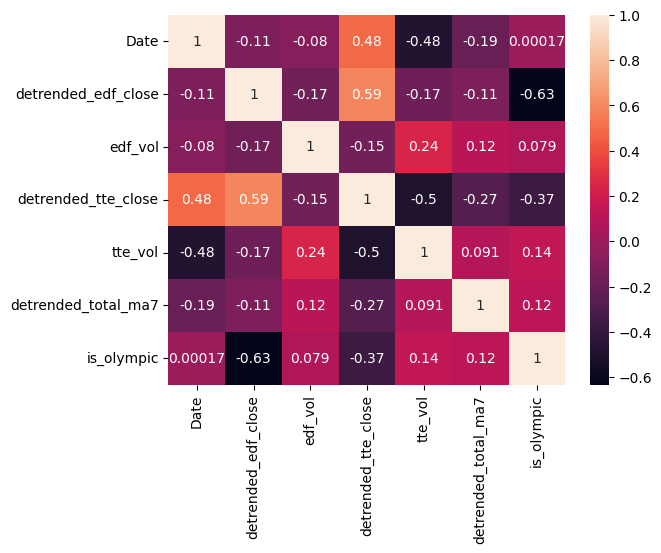

In [313]:
sns.heatmap(df_sm.corr(), annot = True)

In [314]:
df_sm

,Date,detrended_edf_close,edf_vol,detrended_tte_close,tte_vol,detrended_total_ma7,is_olympic
0,2012-01-03,-6.64,1200.00,-1.83,3566.0,-101336.673815,1
1,2012-01-04,-7.61,2440.00,-2.03,3252.5,-89645.245244,1
2,2012-01-05,-7.99,1440.00,-3.09,2800.0,-91276.388101,1
3,2012-01-06,-8.02,885.78,-3.54,2166.7,-100153.673815,1
4,2012-01-09,-8.05,1240.00,-3.04,2471.2,-116190.245244,1
...,...,...,...,...,...,...,...
1241,2014-12-23,3.62,1420.00,0.88,2091.1,-48047.816673,0
1242,2014-12-24,3.63,114.61,0.59,856.0,-49655.102387,0
1243,2014-12-29,3.78,936.44,0.28,2680.5,11256.754756,0
1244,2014-12-30,3.18,1110.00,-0.93,2173.3,36641.183327,0


<Axes: >

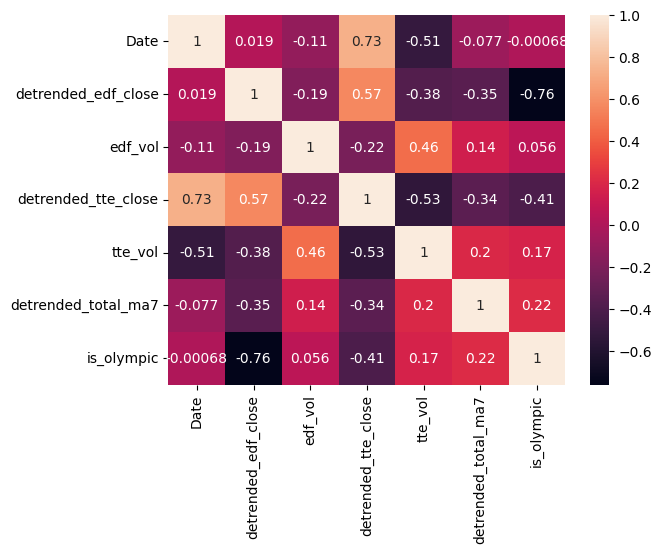

In [315]:
sns.heatmap(df_sm_summer.corr(), annot = True)

some trends:
1. EDF stock price is going fown overtime
2. total electricity demand is going down overtime
3. if were to look at renewable energy, need to deal with 0's

TO-DO:
1. remove trend
2. explore other stocks?